<a href="https://colab.research.google.com/github/chamathjh/VaR_and_stressed_VaR/blob/main/VaR_and_stressed_VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_days = 252   # one trading year
n_assets = 5

# Simulated mean daily returns and volatilities
mean_daily_returns = np.array([0.0005, 0.0003, 0.0004, 0.0002, 0.0006])
vol_daily = np.array([0.01, 0.012, 0.009, 0.013, 0.011])

# Simulate correlated returns using a covariance matrix
corr_matrix = np.array([
    [1.0, 0.2, 0.3, 0.1, 0.2],
    [0.2, 1.0, 0.1, 0.3, 0.2],
    [0.3, 0.1, 1.0, 0.2, 0.3],
    [0.1, 0.3, 0.2, 1.0, 0.1],
    [0.2, 0.2, 0.3, 0.1, 1.0]
])

cov_matrix = np.outer(vol_daily, vol_daily) * corr_matrix
returns = np.random.multivariate_normal(mean_daily_returns, cov_matrix, n_days)
returns = pd.DataFrame(returns, columns=[f'Asset_{i+1}' for i in range(n_assets)])
returns.head()


,Asset_1,Asset_2,Asset_3,Asset_4,Asset_5
0,-0.011921,-0.009141,-0.003651,-0.000091,0.007628
1,0.010911,-0.003195,0.013406,-0.006488,0.011183
2,0.019599,-0.000841,-0.005747,0.010410,-0.007182
3,0.009409,0.000048,-0.006632,0.015680,-0.005363
4,0.005249,-0.014024,-0.006761,-0.012398,-0.015528


In [2]:
weights = np.array([0.2, 0.3, 0.2, 0.1, 0.2])  # sum = 1
portfolio_returns = returns.dot(weights)


In [3]:
confidence_level = 0.99
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

VaR_parametric = - (mu + sigma * np.sqrt(1) * np.percentile(np.random.normal(0,1,100000), (1-confidence_level)*100))
print(f"Parametric 99% VaR: {VaR_parametric:.4f}")


Parametric 99% VaR: 0.0151


In [4]:
VaR_historical = -np.percentile(portfolio_returns, (1-confidence_level)*100)
print(f"Historical 99% VaR: {VaR_historical:.4f}")


Historical 99% VaR: 0.0148


In [5]:
simulations = 100000
simulated_returns = np.random.multivariate_normal(mean_daily_returns, cov_matrix, simulations).dot(weights)
VaR_monte_carlo = -np.percentile(simulated_returns, (1-confidence_level)*100)
print(f"Monte Carlo 99% VaR: {VaR_monte_carlo:.4f}")


Monte Carlo 99% VaR: 0.0153


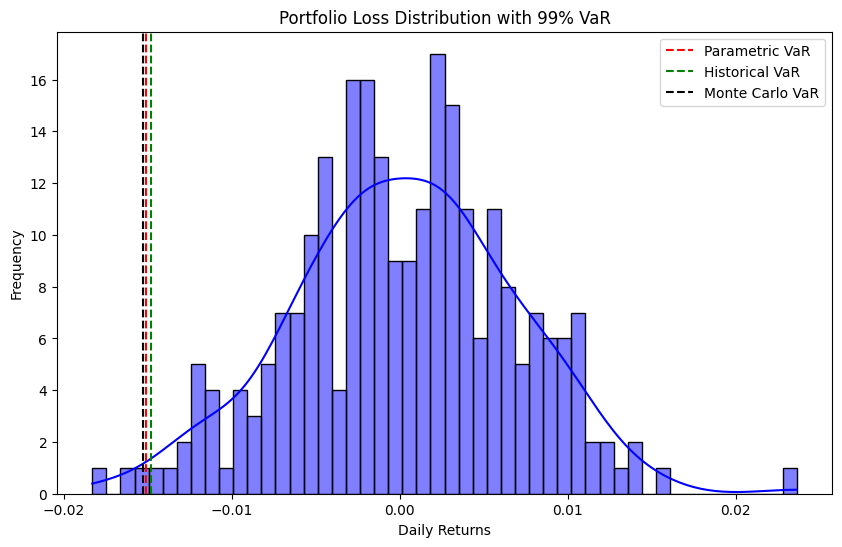

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(portfolio_returns, bins=50, kde=True, color='blue')
plt.axvline(-VaR_parametric, color='red', linestyle='--', label='Parametric VaR')
plt.axvline(-VaR_historical, color='green', linestyle='--', label='Historical VaR')
plt.axvline(-VaR_monte_carlo, color='black', linestyle='--', label='Monte Carlo VaR')
plt.title("Portfolio Loss Distribution with 99% VaR")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.legend()
plt.show()
